In [3]:
%matplotlib notebook

from __future__ import division
import math
from scipy.special import zeta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

<IPython.core.display.Javascript object>


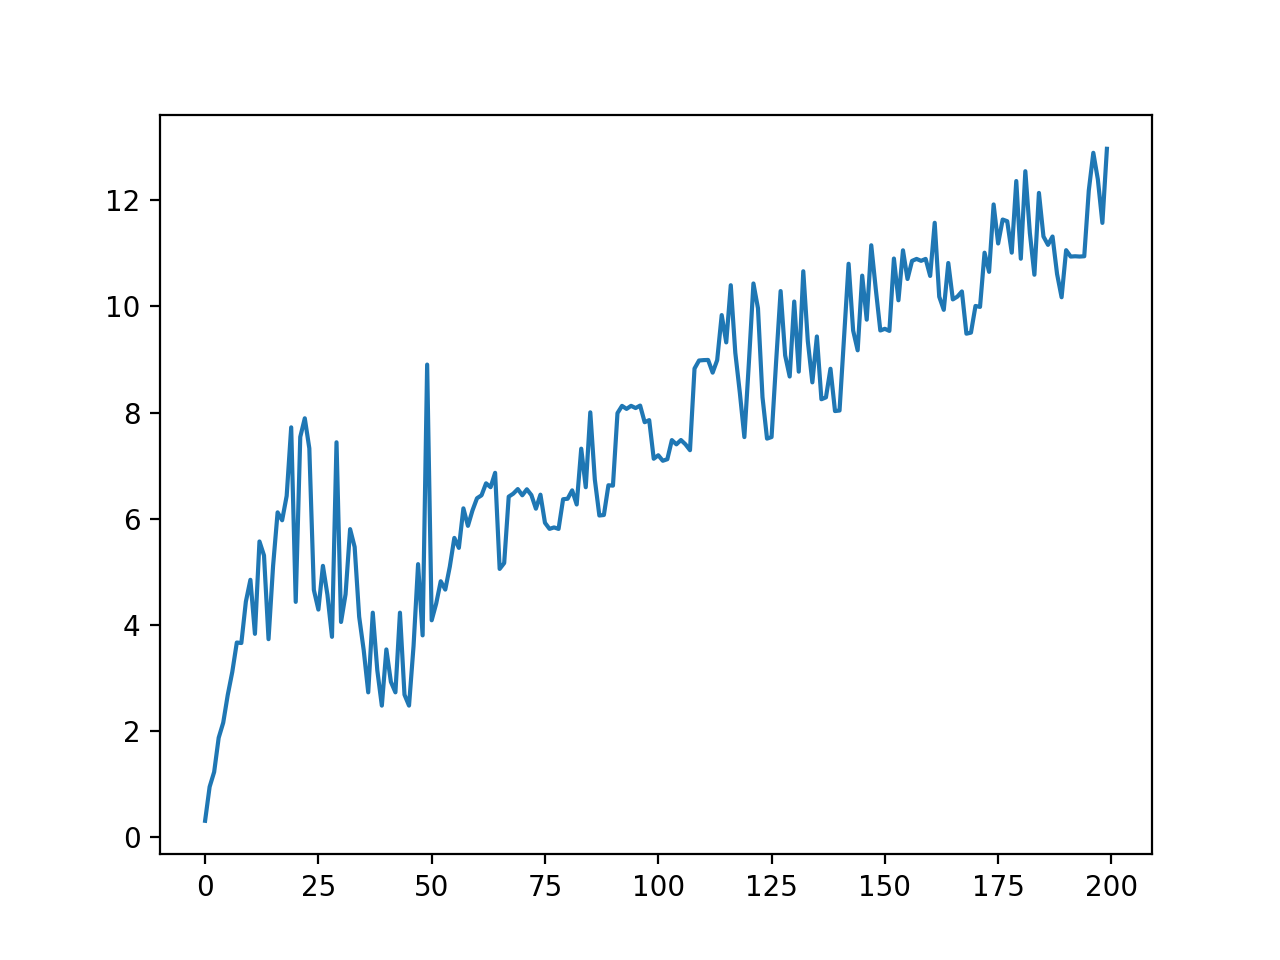

In [30]:
NORM_CONSTANT = zeta(3,1)
def prob(n):
    # n >= 1
    return 1 / (n*n*n) / NORM_CONSTANT

def integral(p):
    prev = float('inf')
    acc = 0.0
    n = 1
    while 1 - acc > 1e-7:
        prev, acc, n = acc, acc + p(n), n + 1
    return acc

def expect(p):
    prev = float('inf')
    acc, n = 0.0, 1
    while abs(prev - acc) > 1e-10:
        prev, acc, n = acc, acc + n * p(n), n + 1
    return acc

def c_trans(p):
    def pre_p(n):
        # n >= 1
        if n % 2 == 0:
            return p(n // 2)
        else:
            n_ = (n + 1) // 2
            return p(3 * n_ - 1)
    prev = float('-inf')
    acc = 0.0
    n = 1
    while acc - prev > 1e-10:
        prev, acc, n = acc, acc + pre_p(n), n + 1
    return (lambda n: pre_p(n)/acc) 

p_i = prob
v = []
for i in range(200):
    v.append((i, expect(p_i)))
    p_i = c_trans(p_i)
v = np.array(v)
plt.plot(v[:,0], np.log(v[:,1]))
plt.show()

**so it looks like the expectation is growing!!**